In [2]:
import pandas as pd
import pyarrow.parquet as pq

In [3]:
df = pd.read_parquet('../Dataset/train.parquet')

In [4]:
df.head()

,id,channel_1,channel_10,channel_11,channel_12,channel_13,channel_14,channel_15,channel_16,channel_17,...,telecommand_351,telecommand_352,telecommand_353,telecommand_354,telecommand_36,telecommand_376,telecommand_38,telecommand_39,telecommand_40,is_anomaly
0,0,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
list(df.columns)

['id',
 'channel_1',
 'channel_10',
 'channel_11',
 'channel_12',
 'channel_13',
 'channel_14',
 'channel_15',
 'channel_16',
 'channel_17',
 'channel_18',
 'channel_19',
 'channel_2',
 'channel_20',
 'channel_21',
 'channel_22',
 'channel_23',
 'channel_24',
 'channel_25',
 'channel_26',
 'channel_27',
 'channel_28',
 'channel_29',
 'channel_3',
 'channel_30',
 'channel_31',
 'channel_32',
 'channel_33',
 'channel_34',
 'channel_35',
 'channel_36',
 'channel_37',
 'channel_38',
 'channel_39',
 'channel_4',
 'channel_40',
 'channel_41',
 'channel_42',
 'channel_43',
 'channel_44',
 'channel_45',
 'channel_46',
 'channel_47',
 'channel_48',
 'channel_49',
 'channel_5',
 'channel_50',
 'channel_51',
 'channel_52',
 'channel_53',
 'channel_54',
 'channel_55',
 'channel_56',
 'channel_57',
 'channel_58',
 'channel_59',
 'channel_6',
 'channel_60',
 'channel_61',
 'channel_62',
 'channel_63',
 'channel_64',
 'channel_65',
 'channel_66',
 'channel_67',
 'channel_68',
 'channel_69',
 'channel

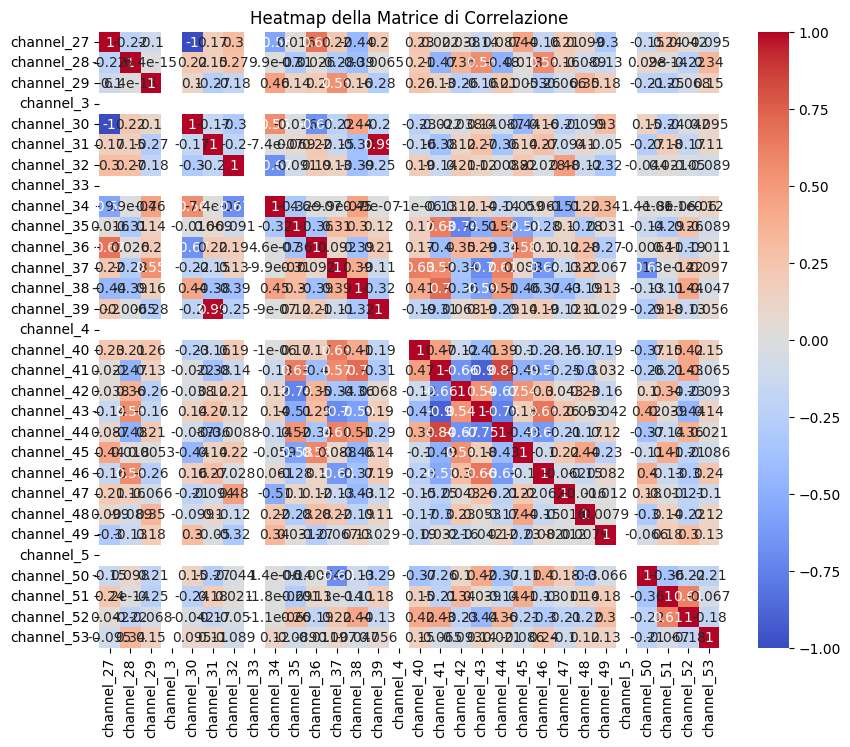

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[20:50, 20:50].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap della Matrice di Correlazione')
plt.show()

In [11]:
file_path = '../Dataset/train.parquet'
columns_to_read = ["is_anomaly"] + [f"channel_{i}" for i in range(41, 47)]

# Legge direttamente solo le colonne richieste
table = pq.read_table(file_path, columns=columns_to_read)
df = table.to_pandas()
print(df.head())

   is_anomaly  channel_41  channel_42  channel_43  channel_44  channel_45  \
0           0    0.812578    0.786344    0.771900    0.799178    0.816855   
1           0    0.812578    0.786344    0.771900    0.799178    0.816855   
2           0    0.821213    0.789557    0.770317    0.809411    0.816006   
3           0    0.819642    0.786344    0.770317    0.807050    0.816855   
4           0    0.821996    0.788753    0.770317    0.807837    0.818551   

   channel_46  
0    0.765296  
1    0.765296  
2    0.765296  
3    0.766985  
4    0.761073  


In [19]:
file_path = '../Dataset/test.parquet'
df_test = pd.read_parquet(file_path)

df_test.columns

Index(['id', 'channel_1', 'channel_10', 'channel_11', 'channel_12',
       'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17',
       'channel_18', 'channel_19', 'channel_2', 'channel_20', 'channel_21',
       'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26',
       'channel_27', 'channel_28', 'channel_29', 'channel_3', 'channel_30',
       'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35',
       'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_4',
       'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44',
       'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49',
       'channel_5', 'channel_50', 'channel_51', 'channel_52', 'channel_53',
       'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58',
       'channel_59', 'channel_6', 'channel_60', 'channel_61', 'channel_62',
       'channel_63', 'channel_64', 'channel_65', 'channel_66', 'channel_67',
       'chann

In [12]:
df.to_parquet('../Dataset/train_41_46.parquet')

(14728321, 7)
is_anomaly
0    9514
1     486
Name: count, dtype: int64


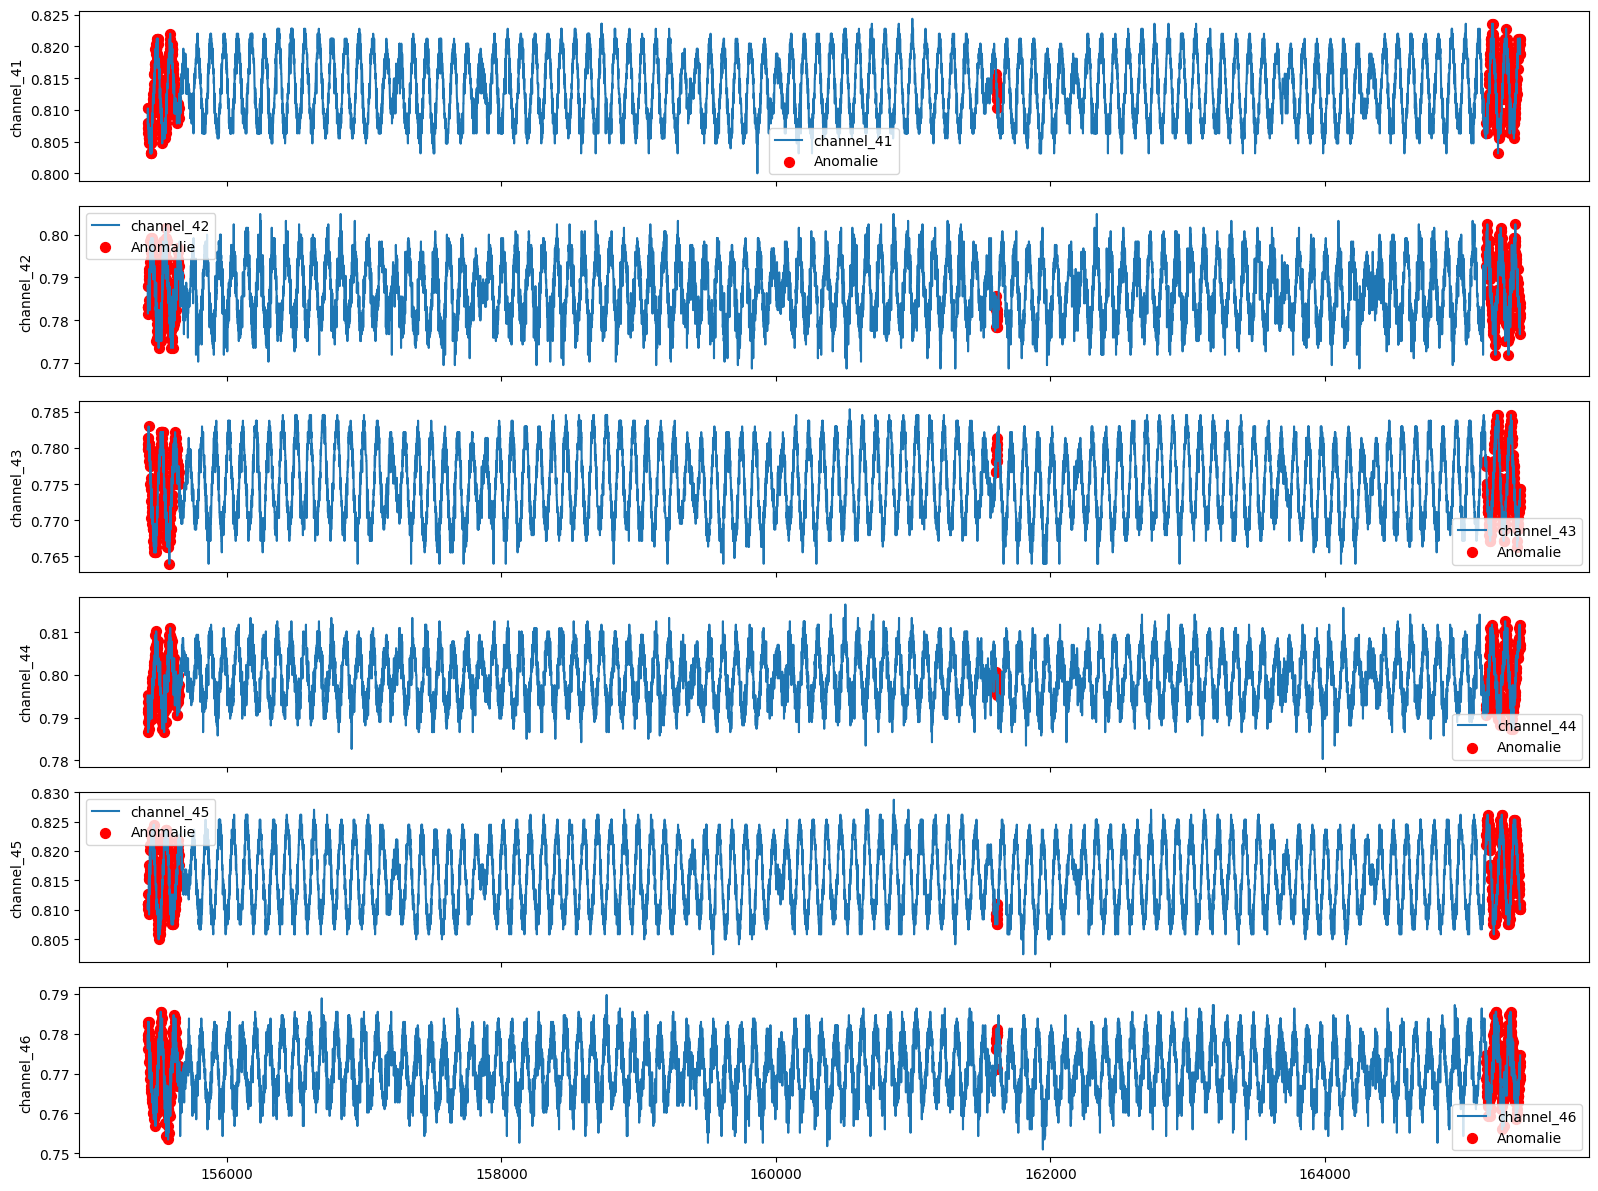

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_parquet('../Dataset/train_41_46.parquet')

print(df.shape)

# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)

start = df["is_anomaly"].idxmax() + 40040
n = 10000
small = df[start:start+n]
outlier = small[small['is_anomaly'] == 1]

print(small["is_anomaly"].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

In [17]:
from itertools import groupby
sequences = [(key, len(list(group))) for key, group in groupby(df["is_anomaly"])]

# Stampa il risultato
for value, length in sequences:
    print(f"Valore: {value}, Durata: {length}")

Valore: 0, Durata: 115383
Valore: 1, Durata: 40267
Valore: 0, Durata: 5954
Valore: 1, Durata: 11
Valore: 0, Durata: 3560
Valore: 1, Durata: 681
Valore: 0, Durata: 28709
Valore: 1, Durata: 11
Valore: 0, Durata: 30785
Valore: 1, Durata: 38160
Valore: 0, Durata: 63751
Valore: 1, Durata: 6376
Valore: 0, Durata: 5821
Valore: 1, Durata: 681
Valore: 0, Durata: 88866
Valore: 1, Durata: 20
Valore: 0, Durata: 8125
Valore: 1, Durata: 19
Valore: 0, Durata: 52760
Valore: 1, Durata: 19
Valore: 0, Durata: 17007
Valore: 1, Durata: 310
Valore: 0, Durata: 23523
Valore: 1, Durata: 5
Valore: 0, Durata: 70614
Valore: 1, Durata: 2542
Valore: 0, Durata: 7027
Valore: 1, Durata: 449
Valore: 0, Durata: 46402
Valore: 1, Durata: 660
Valore: 0, Durata: 25164
Valore: 1, Durata: 19
Valore: 0, Durata: 47045
Valore: 1, Durata: 18
Valore: 0, Durata: 322
Valore: 1, Durata: 17
Valore: 0, Durata: 224
Valore: 1, Durata: 17
Valore: 0, Durata: 51806
Valore: 1, Durata: 20
Valore: 0, Durata: 31937
Valore: 1, Durata: 8599
Valor

In [8]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Supponiamo che df sia già stato preparato (dati + colonna 'is_anomaly')

# 1. Split: train/test (80/20), stratificato per mantenere proporzioni classi
X = df.drop(['is_anomaly', 'id'], axis=1)
y = df['is_anomaly']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Training
model = xgb.XGBClassifier(
    objective='binary:logistic',  # per classificazione binaria
    use_label_encoder=False,
    eval_metric='logloss'         # evita warning deprecato
)
model.fit(X_train, y_train)

# 3. Predizione sul validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]  # probabilità della classe 1 (anomaly)

# 4. Valutazione
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=3))

print("ROC AUC Score:", roc_auc_score(y_val, y_proba))


c:\Users\ggion\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:47:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[2633865    2979]
 [   8550  300271]]

Classification Report:
              precision    recall  f1-score   support

           0      0.997     0.999     0.998   2636844
           1      0.990     0.972     0.981    308821

    accuracy                          0.996   2945665
   macro avg      0.993     0.986     0.989   2945665
weighted avg      0.996     0.996     0.996   2945665

ROC AUC Score: 0.9992095771775051


In [28]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# 1. Split: mantieni le label solo per la valutazione
X = df.drop('is_anomaly', axis=1)
y = df['is_anomaly']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Addestra Isolation Forest SOLO su X_train (senza label)
iso_forest = IsolationForest(
    n_estimators=100,
    contamination='auto',  # o specifica una percentuale se nota
    random_state=42
)
iso_forest.fit(X_train)

# 3. Predizione sul validation set
# Isolation Forest predice: 1 (normal), -1 (anomaly)
y_pred_raw = iso_forest.predict(X_val)
y_pred = (y_pred_raw == -1).astype(int)  # converti: 1 = anomaly

# 4. Valutazione
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=3))

# IsolationForest non fornisce probabilità vere, ma puoi usare score_samples
# Più basso = più anomalo
scores = -iso_forest.score_samples(X_val)
print("ROC AUC Score:", roc_auc_score(y_val, scores))


Confusion Matrix:
[[2614915   21929]
 [ 268200   40621]]

Classification Report:
              precision    recall  f1-score   support

           0      0.907     0.992     0.947   2636844
           1      0.649     0.132     0.219    308821

    accuracy                          0.902   2945665
   macro avg      0.778     0.562     0.583   2945665
weighted avg      0.880     0.902     0.871   2945665

ROC AUC Score: 0.6089913586889363


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Split
X = df.drop('is_anomaly', axis=1)
y = df['is_anomaly']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Modello Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# 3. Predizione
y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1]

# 4. Valutazione
print("🎯 Random Forest Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=3))

print("ROC AUC Score:", roc_auc_score(y_val, y_proba))


In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# 1. Preprocessing (scaling numerico per MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Costruzione MLP
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. Training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# 4. Predizione e valutazione
y_proba = model.predict(X_val).flatten()
y_pred = (y_proba > 0.5).astype(int)

print("🎯 MLP Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=3))

print("ROC AUC Score:", roc_auc_score(y_val, y_proba))


NameError: name 'X' is not defined